In [14]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import seaborn
from sklearn.linear_model import Perceptron
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Dropout

Данные о качестве (вкусе) яблок. В основном предоставлены Американскими агрокультурными компаниями.

Загрузка данных

In [15]:
data = pandas.read_csv('data/apple_quality.csv')
data = data.drop(['A_id'], axis=1)
data = data.dropna()

Преобразование целевой переменной

In [16]:
le = LabelEncoder()
data['Quality'] = data['Quality'].apply(lambda x: 1 if x == 'good' else 0)
y = le.fit_transform(data['Quality'])
x = data.drop(['Quality'], axis=1)
x

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720


Разделение данных

In [18]:
x = StandardScaler().fit_transform(x) 
x_reshaped = x.reshape(x.shape[0], x.shape[1], 1)  # (samples, features, 1)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y) # Выделяет 20% данных в качестве тестовых, 80% в качестве данных для обучения, сохраняет соотношение "хороших" и "плохих" яблок (за счет stratify=y)

CNN

In [19]:
cnn = Sequential([
    Conv1D(28, kernel_size=3, activation='relu', input_shape=(x.shape[1], 1)), # Cверточный слой для 1D-данных
    MaxPooling1D(2), # Уменьшает размер данных, оставляя только самые важные признаки.
    Conv1D(56, kernel_size=2, activation='relu'), # Второй сверточный слой с 64 фильтрами и окном размера 2, учится находить более сложные паттерны.
    Dropout(0.3),
    Flatten(), # Преобразует многомерные данные в одномерный вектор.
    Dense(28, activation='relu'), # Полносвязный слой с 32 нейронами. Здесь нейроны анализируют все признаки сразу, чтобы принять решение.
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Выходной слой с 1 нейроном. Сигмоида (sigmoid) преобразует выход в число от 0 до 1
])

cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/Users/karpova.eo/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Обучение CNN

In [20]:
history_cnn = cnn.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5768 - loss: 0.6729 - val_accuracy: 0.6797 - val_loss: 0.5997
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6974 - loss: 0.5937 - val_accuracy: 0.7281 - val_loss: 0.5493
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7425 - loss: 0.5474 - val_accuracy: 0.7516 - val_loss: 0.4999
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7589 - loss: 0.5039 - val_accuracy: 0.7812 - val_loss: 0.4579
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7993 - loss: 0.4514 - val_accuracy: 0.7969 - val_loss: 0.4202
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7985 - loss: 0.4328 - val_accuracy: 0.8047 - val_loss: 0.4055
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7907 - loss: 0.4368 - val_accuracy: 0.8062 - val_loss: 0.3892
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8108 - loss: 0.4000 - val_accuracy: 0.7953 - val_loss:

RNN

In [29]:
rnn = Sequential([
    Reshape((x.shape[1], 1)), # Меняет форму данных
    LSTM(112, return_sequences=True), # тип нейронов, которые умеют запоминать информацию из предыдущих шагов 
    LSTM(28), # возвращает только последний выход последовательности
    Dense(1, activation='sigmoid') # обычный полносвязный слой
])

rnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Обучение RNN

In [30]:
history_rnn = rnn.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6052 - loss: 0.6496 - val_accuracy: 0.6906 - val_loss: 0.5739
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7168 - loss: 0.5646 - val_accuracy: 0.7141 - val_loss: 0.5548
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7112 - loss: 0.5553 - val_accuracy: 0.7172 - val_loss: 0.5389
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7061 - loss: 0.5482 - val_accuracy: 0.7219 - val_loss: 0.5232
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7292 - loss: 0.5382 - val_accuracy: 0.7078 - val_loss: 0.5207
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7122 - loss: 0.5287 - val_accuracy: 0.7188 - val_loss: 0.5097
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7259 - loss: 0.5046 - val_accuracy: 0.7453 - val_loss: 0.4968
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7450 - loss: 0.4822 - val_accuracy: 0.7563 - val_loss:

Оценка методов

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
CNN:
Accuracy: 0.851

              precision    recall  f1-score   support

         bad       0.87      0.83      0.85       399
        good       0.84      0.88      0.86       401

    accuracy                           0.85       800
   macro avg       0.85      0.85      0.85       800
weighted avg       0.85      0.85      0.85       800


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
RNN:
Accuracy: 0.885

              precision    recall  f1-score   support

         bad       0.89      0.87      0.88       399
        good       0.88      0.90      0.89       401

    accuracy                           0.89       800
   macro avg       0.89      0.88      0.88       800
weighted avg       0.89      0.89      0.88       800




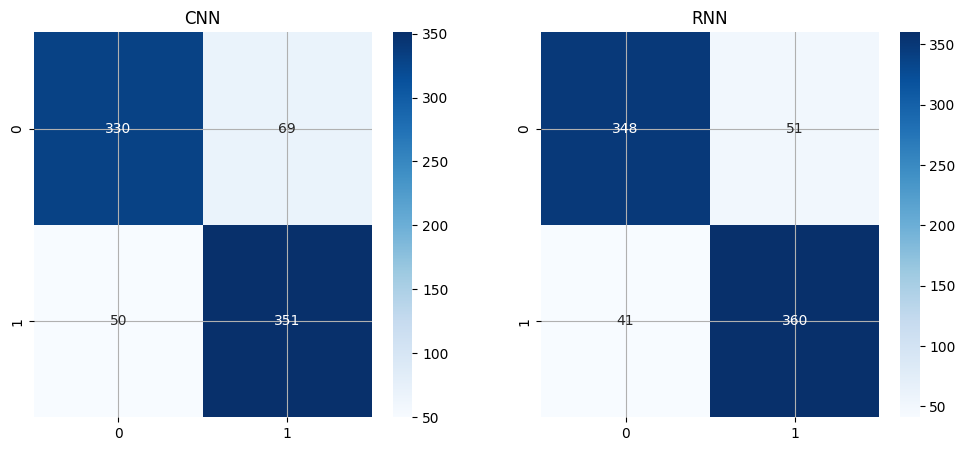

In [31]:
def evaluate_model(name, model, x_test, plot_config):
    plt.subplot(plot_config)
    
    # Получаем вероятности классов
    y_pred_proba = model.predict(x_test)
    
    # Преобразуем вероятности в бинарные метки (0 или 1)
    y_pred = numpy.round(y_pred_proba).astype(int)

    print(name + ":")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}\n")

    print(classification_report(y_test, y_pred, target_names=["bad", "good"]))

    print()

    plt.title(name)
    
    cm = confusion_matrix(y_test, y_pred)
    seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.grid()

plt.figure(figsize=(12, 5))

evaluate_model("CNN", cnn, x_test, 121)
evaluate_model("RNN", rnn, x_test, 122)

# precision - точность, сколько из определенных "плохими" яблок действительно плохие
# recall - полнота, сколько модель нашла действительно "плохих" яблок
# f1-score - общий показатель на основе precision и recall